# Photorealistic Style Transfer
---

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
import time

import torch
import torch.nn
import torch.optim as optim
from torchvision import transforms, models

import HRNET
import utils_st as utils

Checking if the system is connected with any GPU or not.

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print('connected device : ',device)


connected device :  cuda


Downloading the VGG19 model to use for the main cause

In [ ]:
VGG = models.vgg19(pretrained=True).features
VGG.to(device)
print(VGG)
for parameter in VGG.parameters():
    parameter.requires_grad_(False)

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /root/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth



Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPo

In [ ]:
art_stn = HRNET.HRNet()
art_stn.to(device)
print(art_stn)

HRNet(
  (pass1_1): BasicBlock(
    (relu): ReLU(inplace=True)
    (identity_block): Sequential(
      (0): ConvLayer(
        (conv): Conv2d(3, 4, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): InstanceNorm2d(4, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (2): ReLU()
      (3): ConvLayer(
        (conv): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (4): InstanceNorm2d(4, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (5): ReLU()
      (6): ConvLayer(
        (conv): Conv2d(4, 16, kernel_size=(1, 1), stride=(1, 1))
      )
      (7): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (8): ReLU()
    )
    (shortcut): Sequential(
      (0): ConvLayer(
        (conv): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1))
      )
      (1): InstanceNorm2d(16, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
    )
  )
  (pass1_2): BasicBlock(
    

Now going to visualize the Content and the style images.

In [ ]:
content_path="content1.jpg"
style_path="style1.jpg"

In [ ]:
content_image = utils.load_image(content_path) 
content_image = content_image.to(device)

style_image = utils.load_image(style_path) 
style_image = style_image.to(device)

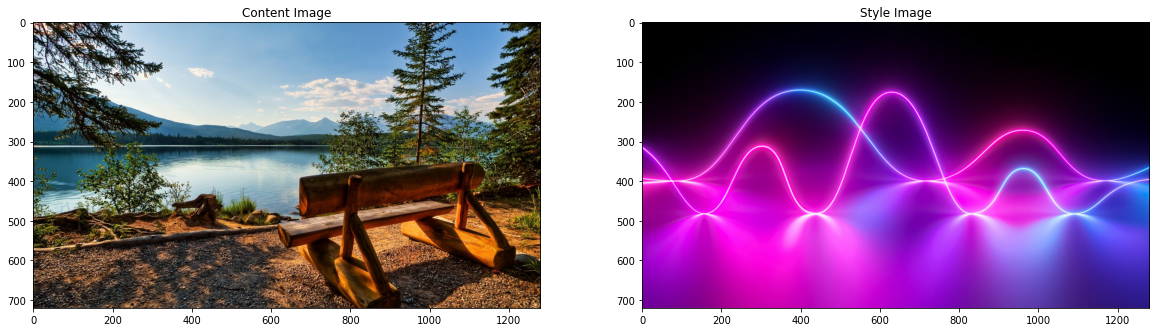

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
ax1.imshow(utils.im_convert(content_image))
ax2.imshow(utils.im_convert(style_image))
ax1.set_title('Content Image')
ax2.set_title('Style Image')
plt.show()

In [ ]:
content_features = utils.get_features(content_image, VGG)
style_features   = utils.get_features(style_image, VGG)
style_gram_matrixs = {layer: utils.get_grim_matrix(style_features[layer]) for layer in style_features}
target = content_image.clone().requires_grad_(True).to(device)

In [ ]:
style_weights = {'conv1_1': 0.1,
                 'conv2_1': 0.2,
                 'conv3_1': 0.4,
                 'conv4_1': 0.8,
                 'conv5_1': 1.6}
content_weight = 150
style_weight = 1
show_every = 100
optimizer = optim.Adam(art_stn.parameters(), lr=5e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=200, gamma=0.9)
steps = 1000
content_loss_epoch = []
style_loss_epoch = []
total_loss_epoch = []
output_image = content_image

Model fitting and optimization
---

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


After 0 criterions:
Total loss:  8289.9326171875
Content loss:  8.272107124328613
Style loss:  7049.1162109375


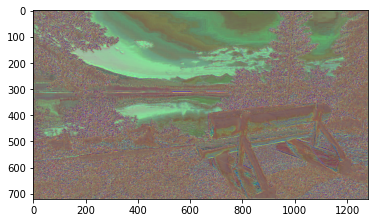

After 100 criterions:
Total loss:  809.5166015625
Content loss:  4.175446033477783
Style loss:  183.19967651367188


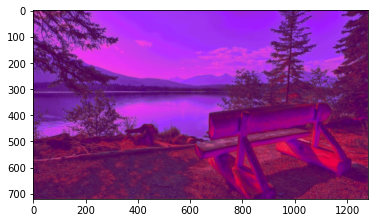

After 200 criterions:
Total loss:  663.3713989257812
Content loss:  3.161897659301758
Style loss:  189.0867462158203


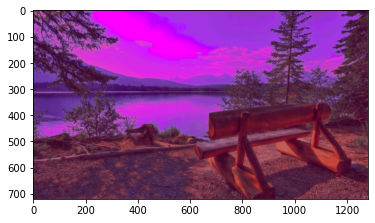

After 300 criterions:
Total loss:  586.9155883789062
Content loss:  2.608238935470581
Style loss:  195.6797332763672


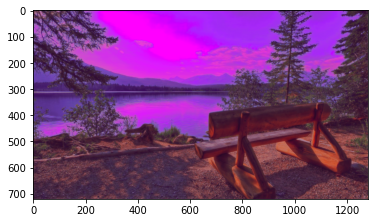

After 400 criterions:
Total loss:  544.0926513671875
Content loss:  2.2632997035980225
Style loss:  204.59768676757812


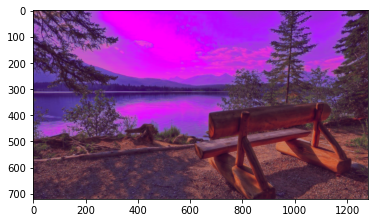

After 500 criterions:
Total loss:  521.030517578125
Content loss:  2.123427152633667
Style loss:  202.51646423339844


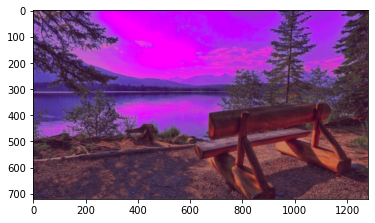

After 600 criterions:
Total loss:  505.4602966308594
Content loss:  2.0402944087982178
Style loss:  199.4161376953125


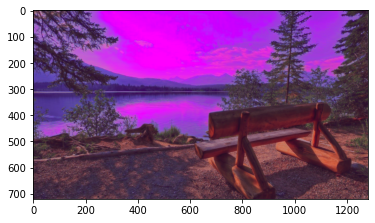

After 700 criterions:
Total loss:  495.040283203125
Content loss:  1.9171112775802612
Style loss:  207.4735870361328


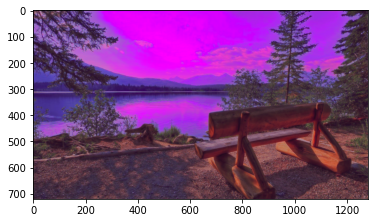

After 800 criterions:
Total loss:  476.572998046875
Content loss:  1.8451684713363647
Style loss:  199.79771423339844


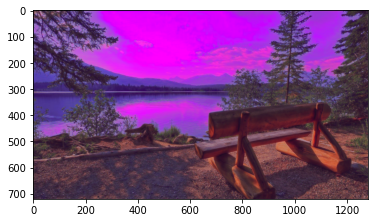

After 900 criterions:
Total loss:  465.07208251953125
Content loss:  1.799141764640808
Style loss:  195.20082092285156


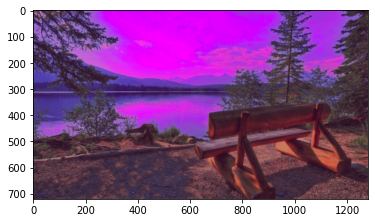

After 1000 criterions:
Total loss:  455.3429260253906
Content loss:  1.7216999530792236
Style loss:  197.08792114257812


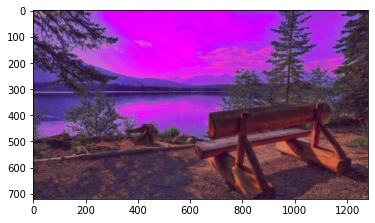

totally cost 2068.1215274333954


In [ ]:
time_start=time.time()
for epoch in range(0, steps+1):
    scheduler.step()
    target = art_stn(content_image).to(device)
    target.requires_grad_(True)
    target_features = utils.get_features(target, VGG)  
    content_loss = torch.mean((target_features['conv4_2'] - content_features['conv4_2']) ** 2)
    style_loss = 0
    for layer in style_weights:
        target_feature = target_features[layer] 
        target_gram_matrix = utils.get_grim_matrix(target_feature)
        style_gram_matrix = style_gram_matrixs[layer]
        layer_style_loss = style_weights[layer] * torch.mean((target_gram_matrix - style_gram_matrix) ** 2)
        b, c, h, w = target_feature.shape
        style_loss += layer_style_loss / (c * h * w)
    total_loss = content_weight * content_loss + style_weight * style_loss
    total_loss_epoch.append(total_loss)
    style_loss_epoch.append(style_weight * style_loss)
    content_loss_epoch.append(content_weight * content_loss)
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    if epoch % show_every == 0:
        print("After %d criterions:" % epoch)
        print('Total loss: ', total_loss.item())
        print('Content loss: ', content_loss.item())
        print('Style loss: ', style_loss.item())
        plt.imshow(utils.im_convert(target))
        plt.show()
    output_image = target
time_end=time.time()
print('totally cost', time_end - time_start)

# Thank you :)


 Do star the repo if found helpful.